In [1]:
import cv2 as CV
import numpy as NP
import matplotlib.pyplot as PL
import skimage.feature as F
import skimage.filters as SF

(-0.5, 639.5, 479.5, -0.5)

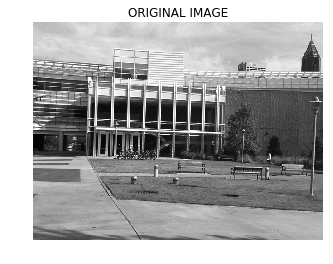

In [2]:
X_1 = CV.imread('transB.jpg')
X_2 = CV.cvtColor(X_1,CV.COLOR_BGR2GRAY)
PL.figure(1)
PL.imshow(X_2,'gray')
PL.title('ORIGINAL IMAGE')
PL.axis('off')

(-0.5, 639.5, 479.5, -0.5)

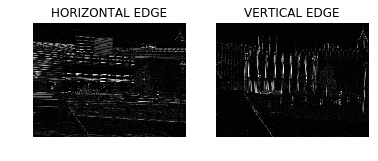

In [3]:
H = SF.sobel_h(X_2)
HORZ = NP.abs(H)
V = SF.sobel_v(X_2)
VERT = NP.abs(V)
PL.figure(2)
PL.subplot(121)
PL.imshow(HORZ,'gray')
PL.title('HORIZONTAL EDGE')
PL.axis('off')

PL.subplot(122)
PL.imshow(VERT,'gray')
PL.title('VERTICAL EDGE')
PL.axis('off')

In [4]:
I_X = HORZ*HORZ
I_Y = VERT*VERT
I_XY = HORZ * VERT

In [5]:
X_B = CV.blur(I_X,(3,3))
Y_B = CV.blur(I_Y,(3,3))
XY_B = CV.blur(I_XY,(3,3))

In [6]:
H = NP.zeros((2,2))
R = NP.zeros((X_2.shape[0],X_2.shape[1]))
for i in range(0,X_2.shape[0]):
    for j in range(0,X_2.shape[1]):
        H[0,0] = X_B[i,j]
        H[0,1] = XY_B[i,j]
        H[1,0] = XY_B[i,j]
        H[1,1] = Y_B[i,j]
        R[i,j] = (NP.linalg.det(H)) - ((0.04)*(NP.matrix.trace(H))**2)

In [7]:
R_A = NP.abs(R)

(-0.5, 639.5, 479.5, -0.5)

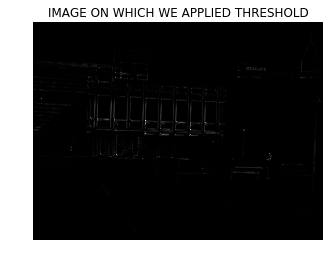

In [8]:
PL.figure(3)
PL.imshow(R_A,'gray')
PL.title('IMAGE ON WHICH WE APPLIED THRESHOLD')
PL.axis('off')

In [9]:
Z_R = NP.zeros((R.shape[0]+2,R.shape[1]+2))
Z_R[1:Z_R.shape[0]-1,1:Z_R.shape[1]-1] = R_A
Z_R.shape

(482, 642)

In [10]:
for i in range(1,Z_R.shape[0]-1):
    for j in range(1,Z_R.shape[1]-1):
        if (Z_R[i,j] > 0.0029*(NP.max(Z_R))) and (Z_R[i,j]>=Z_R[i,j+1]) and (Z_R[i,j]>=Z_R[i,j-1]) and (Z_R[i,j]>=Z_R[i+1,j]) and  (Z_R[i,j]>=Z_R[i-1,j]) and (Z_R[i,j]>=Z_R[i-1,j+1]) and (Z_R[i,j]>=Z_R[i+1,j-1]) and (Z_R[i,j]>=Z_R[i+1,j+1]) and (Z_R[i,j]>=Z_R[i-1,j-1]):
            Y8 = CV.circle(X_1,(j,i),2,(100,200,45),1)

Text(0.5,1,'CORNER DETECTED IMAGE')

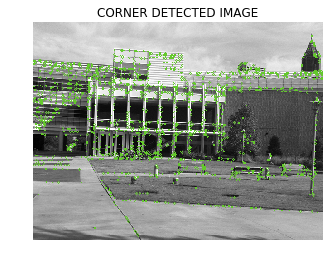

In [11]:
PL.figure(4)
PL.imshow(Y8)
PL.axis('off')
PL.title('CORNER DETECTED IMAGE')